BAR GRAPH

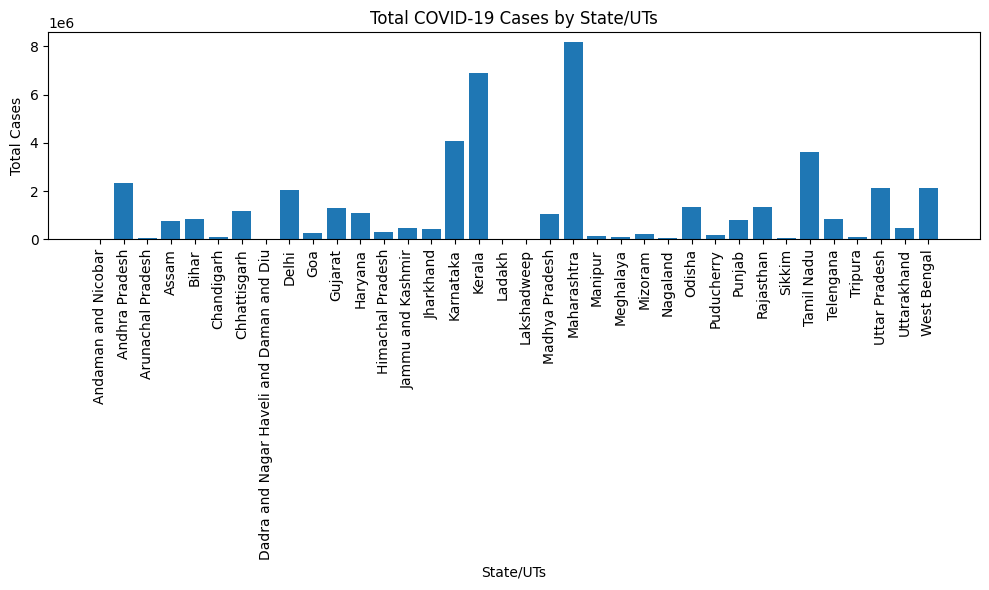

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('D:\\Datasets\\Latest Covid-19 India Status.csv')
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
    exit()

if df.isnull().values.any():
    print("Warning: Missing values found in the data. Please check the data quality.")
    print(df.isnull().sum())  # Print the count of missing values in each column

df_State_UTs = df.groupby('State/UTs').sum().reset_index()  # Corrected variable name

# Check for errors in plotting
try:
    plt.figure(figsize=(10, 6))
    plt.bar(df_State_UTs['State/UTs'], df_State_UTs['Total Cases'])
    plt.title('Total COVID-19 Cases by State/UTs')
    plt.xlabel('State/UTs')
    plt.ylabel('Total Cases')
    plt.xticks(rotation=90)
    plt.tight_layout()  # Ensure labels fit within the figure
    plt.show()
except Exception as e:
    print(f"Error: {str(e)}")


CORRELATION HEATMAP

                                  State/UTs  Total Cases  Active  Discharged  \
0                       Andaman and Nicobar        10766       0       10637   
1                            Andhra Pradesh      2340676       0     2325943   
2                         Arunachal Pradesh        67049       0       66753   
3                                     Assam       746159       5      738119   
4                                     Bihar       855267       1      842952   
5                                Chandigarh       100693       0       99508   
6                              Chhattisgarh      1187695       0     1173505   
7  Dadra and Nagar Haveli and Daman and Diu        11592       0       11588   
8                                     Delhi      2040910      14     2014230   
9                                       Goa       263346       3      259329   

   Deaths  Active Ratio  Discharge Ratio  Death Ratio  Population  
0     129           0.0            98.80         1.

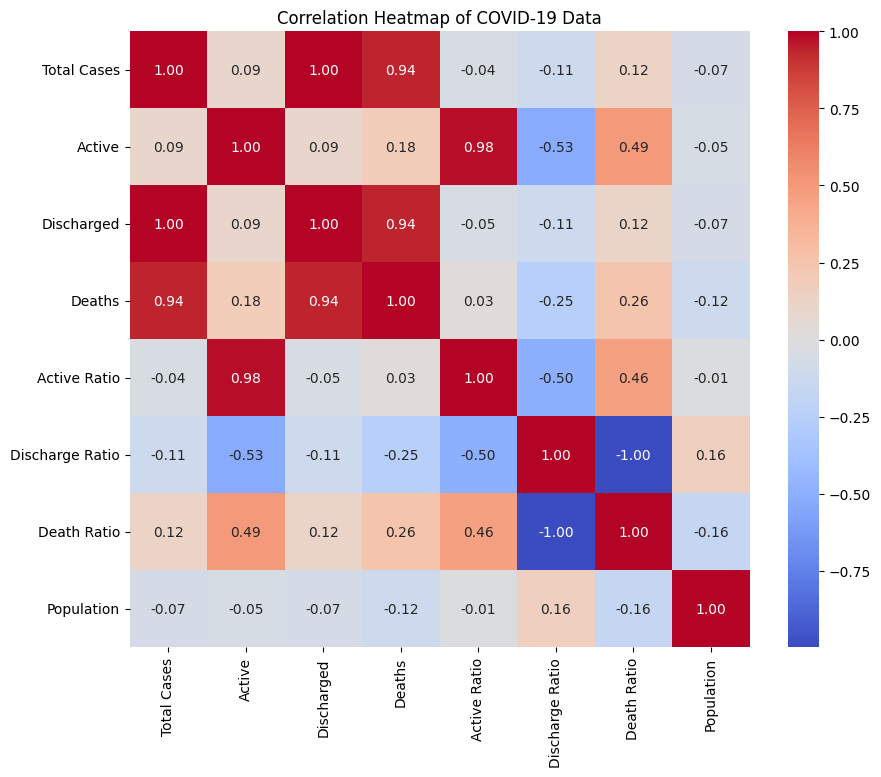

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the COVID-19 data into a DataFrame
file_path = r'D:\Datasets\Latest Covid-19 India Status.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head(10))

# Calculate the correlation matrix, excluding non-numeric columns
corr = df.select_dtypes(include=['number']).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of COVID-19 Data')
plt.show()

PIE CHART

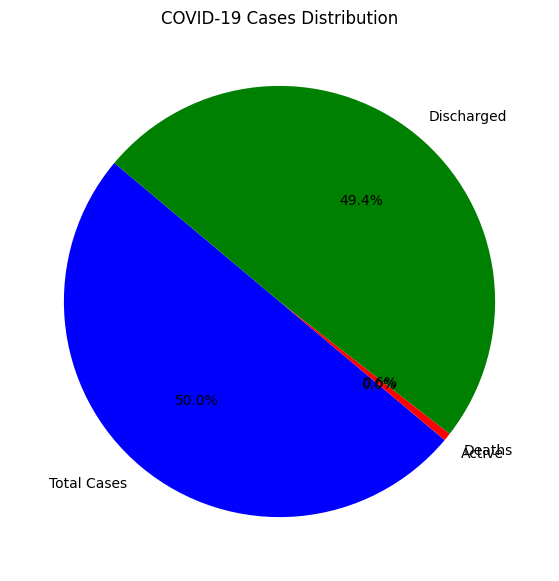

In [3]:
# Load the COVID-19 data into a DataFrame
file_path = r'D:\Datasets\Latest Covid-19 India Status.csv'
df = pd.read_csv(file_path)
plt.figure(figsize=(10, 7))
sizes = [df['Total Cases'].sum(), df['Active'].sum(), df['Deaths'].sum(), df['Discharged'].sum()]
labels = ['Total Cases', 'Active', 'Deaths', 'Discharged']
colors = ['blue', 'orange', 'red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Cases Distribution')
plt.savefig('covid_cases_pie_chart.png')
plt.show()

SCATTER PLOT USING SEABORN

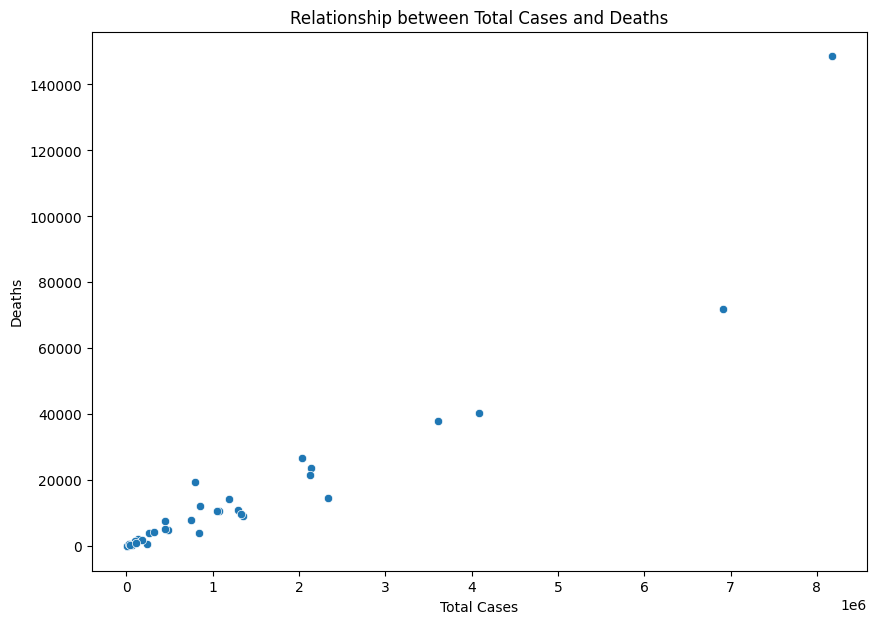

In [4]:
# Scatter plot for relationship between Total Cases and Deaths
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Total Cases', y='Deaths', data=df)
plt.title('Relationship between Total Cases and Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Deaths')
plt.savefig('covid_cases_scatter_plot.png')
plt.show()

SCATTER PLOT USING MATPLOTLIB

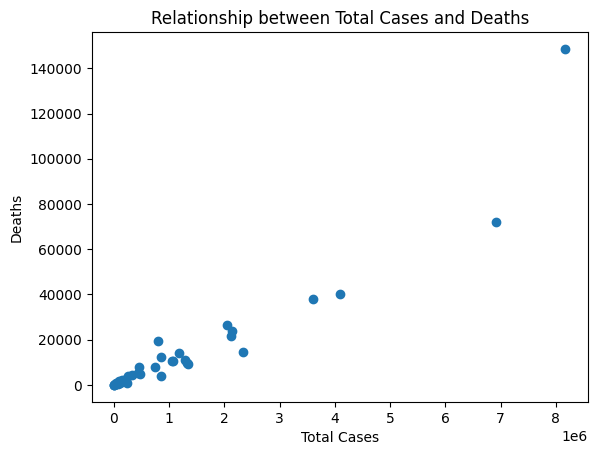

In [5]:
# Enable interactive mode
import matplotlib.pyplot as plt
plt.ion()

# Create an interactive scatter plot
plt.scatter(x='Total Cases', y='Deaths', data=df)
plt.title('Relationship between Total Cases and Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Deaths')
plt.show()

VIOLIN PLOT USING SEABORN

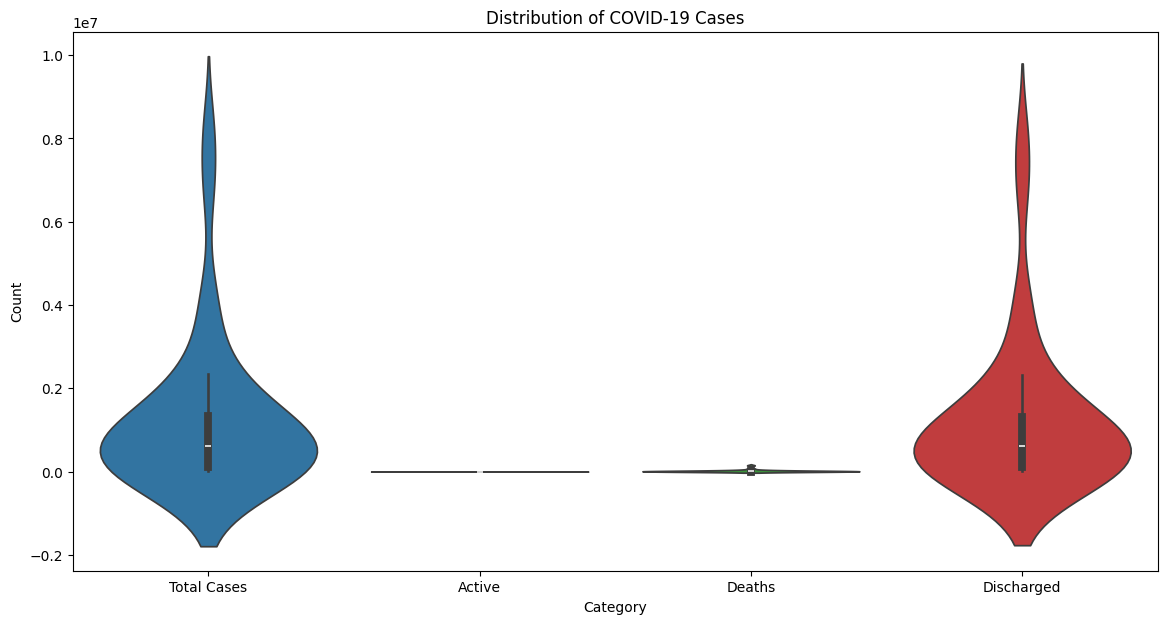

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# If not, replace df with your actual DataFrame

# Create a violin plot
plt.figure(figsize=(14, 7))
sns.violinplot(data=df[['Total Cases', 'Active', 'Deaths', 'Discharged']])
plt.title('Distribution of COVID-19 Cases')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig('covid_cases_violin_plot.png')
plt.show()

HISTOGRAM

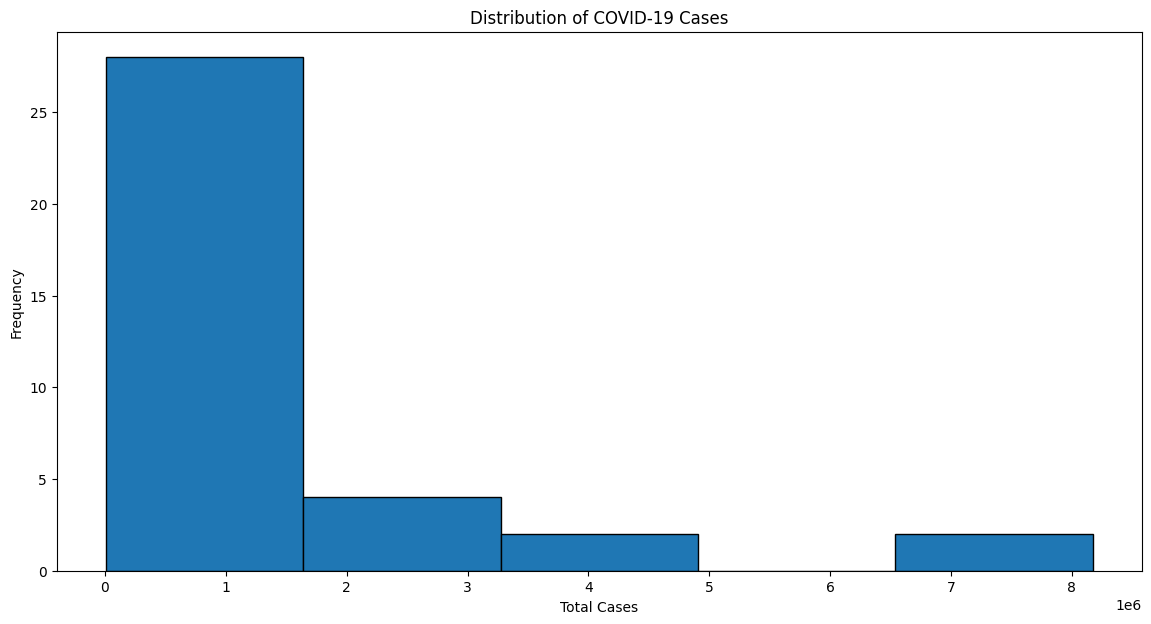

In [7]:

plt.figure(figsize=(14, 7))
plt.hist(df_State_UTs['Total Cases'], bins=5, edgecolor='black')

# Add title and labels
plt.title('Distribution of COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

AREA PLOT

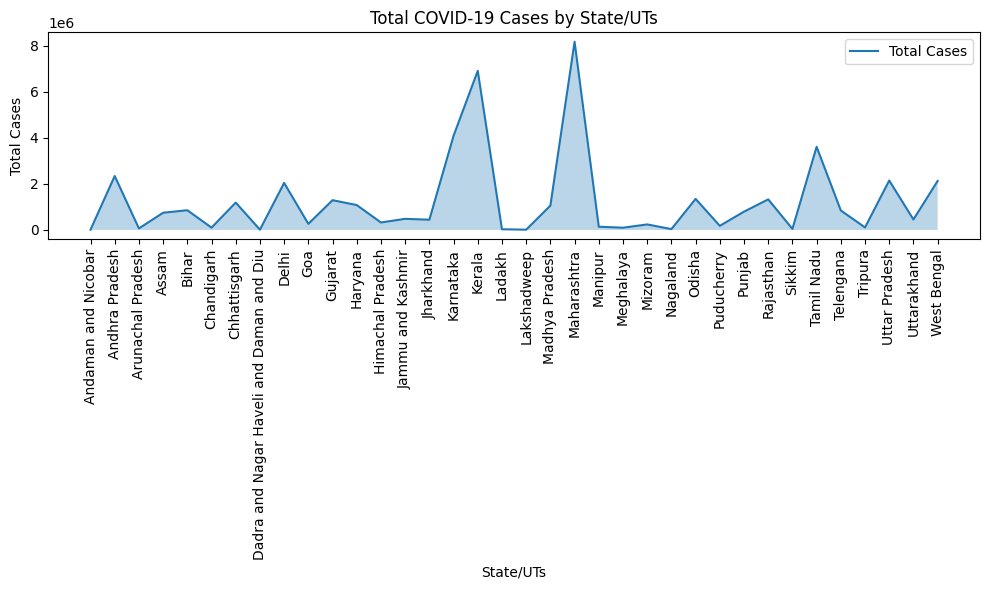

In [8]:

# Assuming 'State/UTs' and 'Total Cases' are columns in the dataset
df_State_UTs = df.groupby('State/UTs')['Total Cases'].sum().reset_index()

# Create an area plot
plt.figure(figsize=(10, 6))
plt.plot(df_State_UTs['State/UTs'], df_State_UTs['Total Cases'], label='Total Cases')
plt.fill_between(df_State_UTs['State/UTs'], df_State_UTs['Total Cases'], alpha=0.3)
plt.title('Total COVID-19 Cases by State/UTs')
plt.xlabel('State/UTs')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.show()

3D PLOT

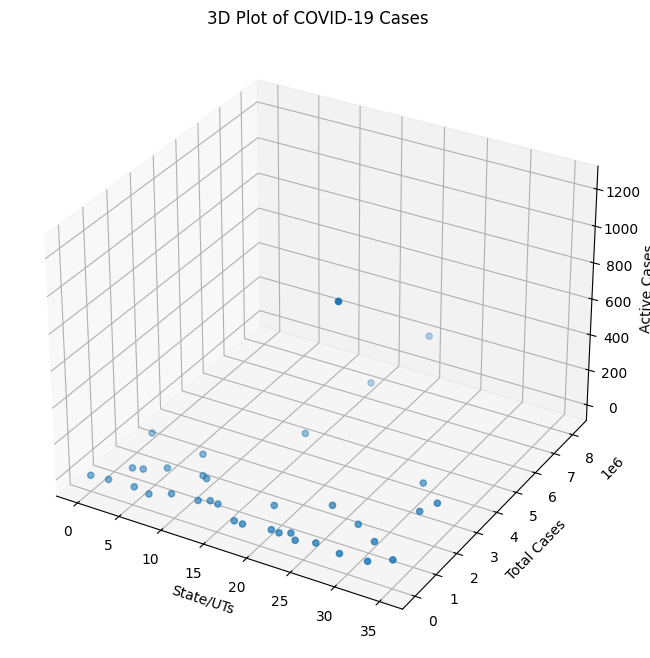

In [9]:
from mpl_toolkits.mplot3d import Axes3D


# Convert the 'State/UTs' column to a numerical value
df['State/UTs'] = pd.factorize(df['State/UTs'])[0]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['State/UTs'], df['Total Cases'], df['Active'])
ax.set_xlabel('State/UTs')
ax.set_ylabel('Total Cases')
ax.set_zlabel('Active Cases')
ax.set_title('3D Plot of COVID-19 Cases')

plt.show()

BOX PLOT

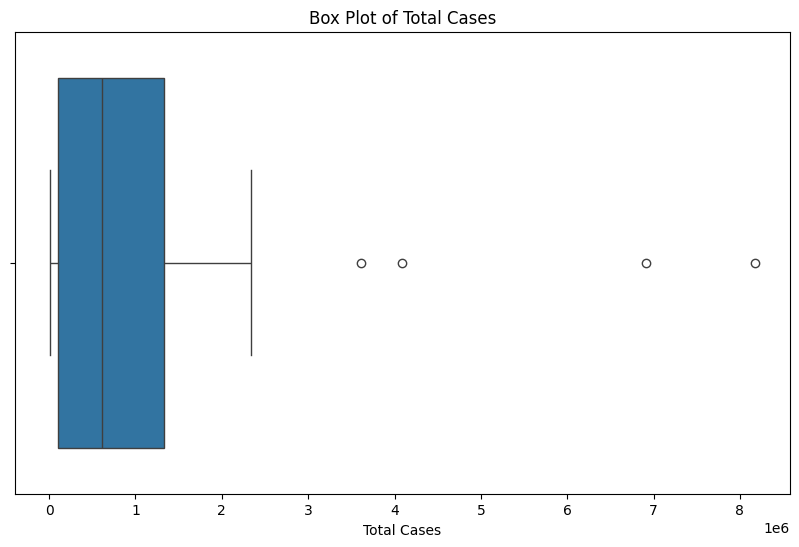

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Total Cases', data=df)
plt.title('Box Plot of Total Cases')
plt.show()



SCIKIT LEARN 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df = pd.read_csv('D:/Datasets/Latest Covid-19 India Status.csv')

# Preprocess the data
X = df[['Population', 'Discharged', 'Deaths']]
y = df['Active']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)**0.5)

Mean Absolute Error: 542.53938354298
Mean Squared Error: 1313482.9649067353
Root Mean Squared Error: 1146.0728445027983


PANDAS DATA CLEANING AND VERIFYING

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('D:\\Datasets\\Latest Covid-19 India Status.csv')

# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for inconsistent data types
print("Data types:")
print(df.dtypes)

# Convert data types if necessary


# Handle inconsistent data
# For example, let's assume 'Total Cases' column should be numeric
df['Total Cases'] = pd.to_numeric(df['Total Cases'], errors='coerce')

# Remove rows with inconsistent data
df.dropna(subset=['Total Cases'], inplace=True)

# Check for outliers
print("Outliers:")
print(df.describe())

# Remove outliers if necessary
# For example, let's assume 'Total Cases' column should be within 3 standard deviations
df = df[np.abs(df['Total Cases']-df['Total Cases'].mean()) <= (3*df['Total Cases'].std())]

# Save the cleaned dataset
df.to_csv('cleaned_covid_data.csv', index=False)



Missing values count:
State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64
Data types:
State/UTs           object
Total Cases          int64
Active               int64
Discharged           int64
Deaths               int64
Active Ratio       float64
Discharge Ratio    float64
Death Ratio        float64
Population           int64
dtype: object
Outliers:
        Total Cases       Active    Discharged         Deaths  Active Ratio  \
count  3.600000e+01    36.000000  3.600000e+01      36.000000     36.000000   
mean   1.249975e+06    50.333333  1.235146e+06   14778.527778      0.005000   
std    1.846038e+06   207.118048  1.820328e+06   27221.140636      0.026673   
min    1.076600e+04     0.000000  1.063700e+04       4.000000      0.000000   
25%    1.065430e+05     0.000000  1.055395e+05    1124.250000      0.000000   
50%    6.140910e+05    

STACKED GRAPH

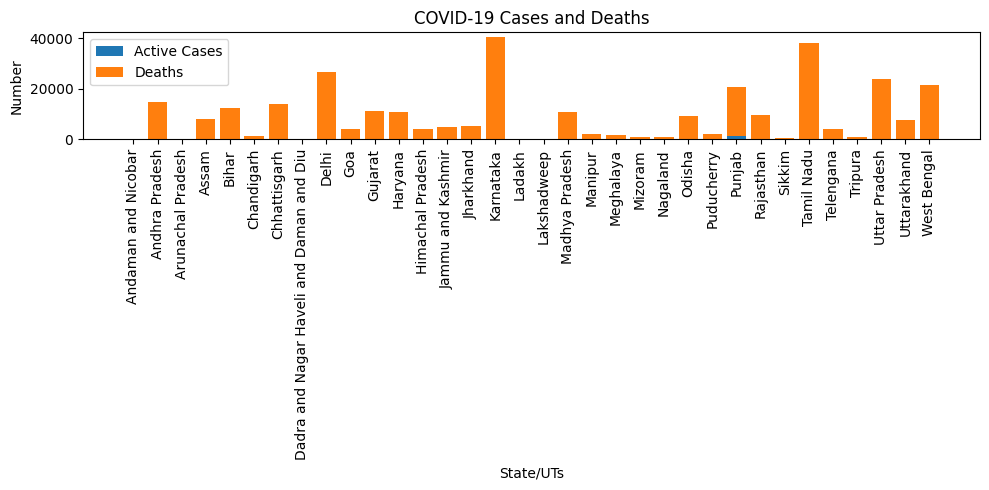

In [13]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(df['State/UTs'], df['Active'], label='Active Cases')
plt.bar(df['State/UTs'], df['Deaths'], label='Deaths', bottom=df['Active'])
plt.xlabel('State/UTs')
plt.ylabel('Number')
plt.title('COVID-19 Cases and Deaths')
plt.legend()
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.tight_layout()  # ensure labels fit within the figure
plt.show()

